In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno

#from mlxtend.frequent_patterns import association_rules

ModuleNotFoundError: No module named 'mlxtend'

In [6]:
path = 'netflix_titles.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [27]:
df2=df[['type','cast', 'description','rating']]
df2.head()

,type,cast,description,rating
0,Movie,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...",Before planning an awesome wedding for his gra...,TV-PG
1,Movie,Jandino Asporaat,Jandino Asporaat riffs on the challenges of ra...,TV-MA
2,TV Show,"Peter Cullen, Sumalee Montano, Frank Welker, J...","With the help of three human allies, the Autob...",TV-Y7-FV
3,TV Show,"Will Friedle, Darren Criss, Constance Zimmer, ...",When a prison ship crash unleashes hundreds of...,TV-Y7
4,Movie,"Nesta Cooper, Kate Walsh, John Michael Higgins...",When nerdy high schooler Dani finally attracts...,TV-14


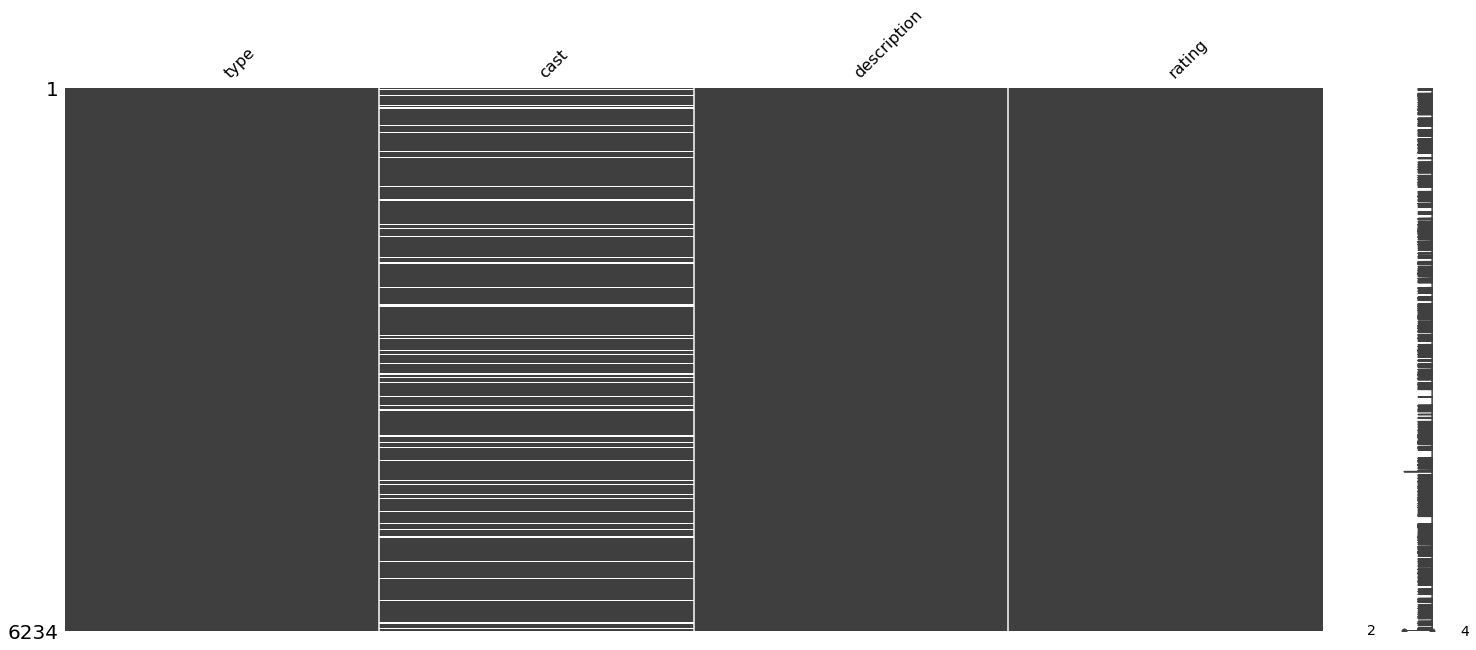

In [28]:
msno.matrix(df2)

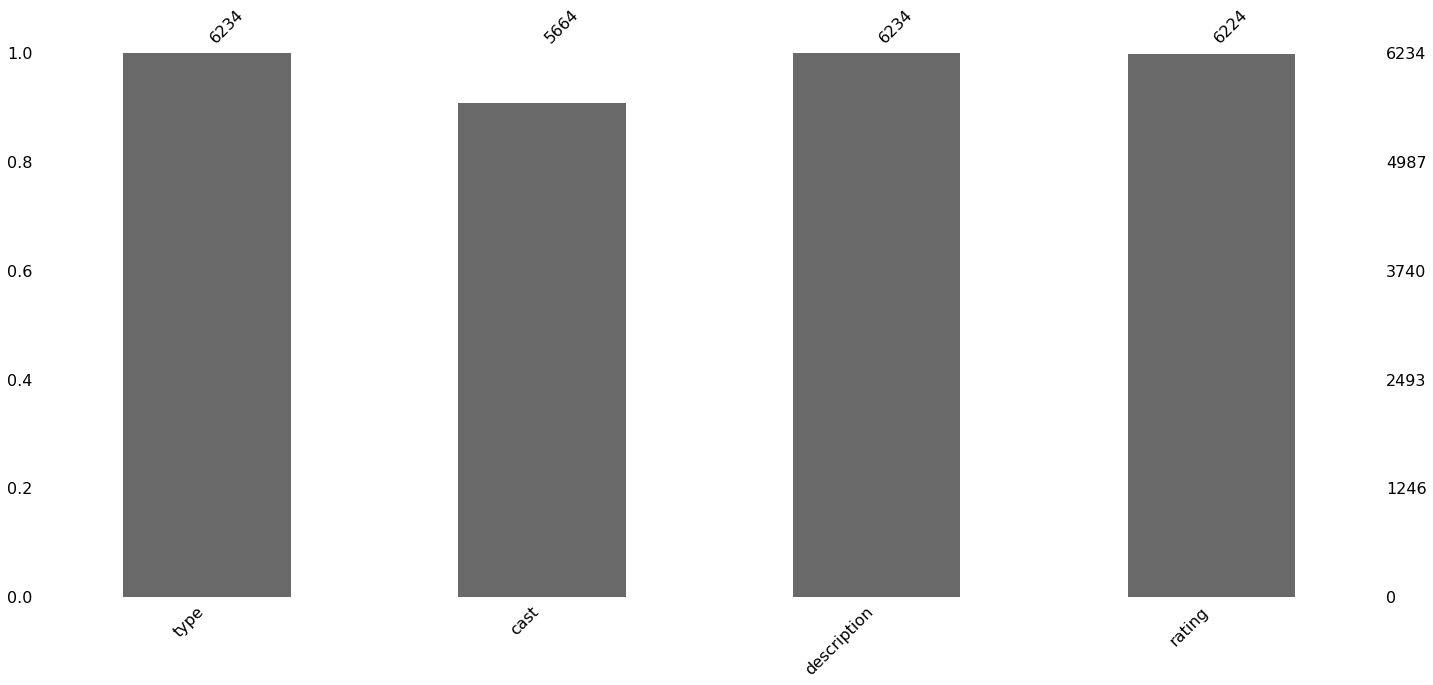

In [29]:
msno.bar(df2)

In [30]:
items = df.groupby('rating').rating.count()
items

rating
G             37
NC-17          2
NR           218
PG           184
PG-13        286
R            508
TV-14       1698
TV-G         149
TV-MA       2027
TV-PG        701
TV-Y         143
TV-Y7        169
TV-Y7-FV      95
UR             7
Name: rating, dtype: int64

In [31]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [32]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,2,7,37,95,143,149,169,184,218,286,508,701,1698,2027
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

NameError: name 'apriori' is not defined